CLAHE-enhanced grayscale image saved at clahe_enhanced_grayscale.jpg
CLAHE-enhanced color image saved at clahe_enhanced_color.jpg


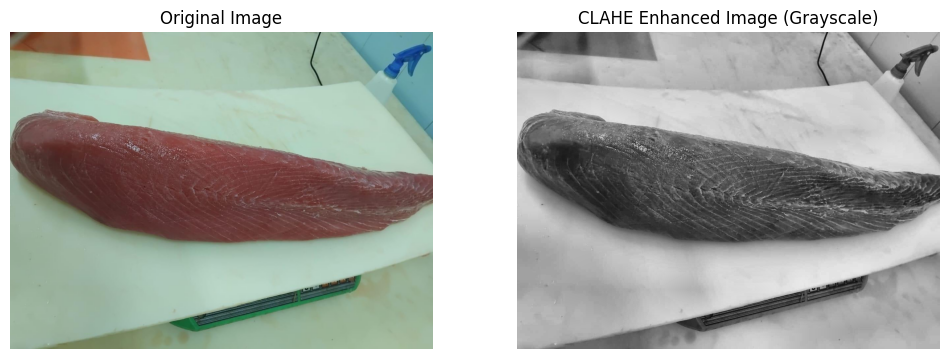

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the path to the image file
image_path = 'C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A3'  # Ensure this path is correct

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Error: The file {image_path} does not exist.")
else:
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Verify if the image was loaded correctly
    if image is None:
        print("Error: Could not load the image. Please check the file format and path.")
    else:
        # Convert image from BGR to RGB for display purposes
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Initialize CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        # Apply CLAHE to grayscale image
        clahe_image = clahe.apply(gray_image)

        # Save the CLAHE-enhanced grayscale image
        output_path_gray = 'clahe_enhanced_grayscale.jpg'
        cv2.imwrite(output_path_gray, clahe_image)
        print(f"CLAHE-enhanced grayscale image saved at {output_path_gray}")

        # For color images, apply CLAHE to each channel
        r, g, b = cv2.split(image_rgb)
        r_clahe = clahe.apply(r)
        g_clahe = clahe.apply(g)
        b_clahe = clahe.apply(b)

        # Merge channels and convert back to BGR for OpenCV
        clahe_color_image = cv2.merge([r_clahe, g_clahe, b_clahe])
        clahe_bgr_image = cv2.cvtColor(clahe_color_image, cv2.COLOR_RGB2BGR)

        # Save the CLAHE-enhanced color image
        output_path_color = 'clahe_enhanced_color.jpg'
        cv2.imwrite(output_path_color, clahe_bgr_image)
        print(f"CLAHE-enhanced color image saved at {output_path_color}")

        # Display the results
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(clahe_image, cmap='gray')
        plt.title('CLAHE Enhanced Image (Grayscale)')
        plt.axis('off')
        plt.show()


In [4]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the directory paths
input_dir = 'C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2'    # Folder containing the original images
output_dir = 'C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)'  # Folder to save the processed images

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize CLAHE with specified parameters
# clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8)) # Subtle contrast improvement without noise
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) # General use; balanced local contrast
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) # Moderate contrast boost, sharper images
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16)) # Softer results, less local enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4)) # High detail, fine local contrast changes
# clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4, 4)) # High enhancement, but potential for noise

# Iterate over each file in the input directory
for filename in os.listdir(input_dir):
    # Construct full file path
    file_path = os.path.join(input_dir, filename)

    # Check if the file is an image (e.g., .jpg, .png)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Load the image
        image = cv2.imread(file_path, cv2.IMREAD_COLOR)

        # Verify if the image was loaded correctly
        if image is None:
            print(f"Error: Could not load {filename}. Skipping.")
            continue

        # Convert image to RGB for display (not required for processing)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        clahe_image = clahe.apply(gray_image)

        # Save the CLAHE-enhanced grayscale image
        output_path_gray = os.path.join(output_dir, f"clahe_{filename}")
        cv2.imwrite(output_path_gray, clahe_image)
        print(f"CLAHE-enhanced grayscale image saved at {output_path_gray}")

        # For color images, apply CLAHE to each channel separately
        r, g, b = cv2.split(image_rgb)
        r_clahe = clahe.apply(r)
        g_clahe = clahe.apply(g)
        b_clahe = clahe.apply(b)

        # Merge the CLAHE-enhanced channels and convert back to BGR for OpenCV
        clahe_color_image = cv2.merge([r_clahe, g_clahe, b_clahe])
        clahe_bgr_image = cv2.cvtColor(clahe_color_image, cv2.COLOR_RGB2BGR)

        # Save the CLAHE-enhanced color image
        output_path_color = os.path.join(output_dir, f"clahe_color_{filename}")
        cv2.imwrite(output_path_color, clahe_bgr_image)
        print(f"CLAHE-enhanced color image saved at {output_path_color}")


CLAHE-enhanced grayscale image saved at C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)\clahe_20241018_132322.jpg
CLAHE-enhanced color image saved at C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)\clahe_color_20241018_132322.jpg
CLAHE-enhanced grayscale image saved at C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)\clahe_20241026_083759.jpg
CLAHE-enhanced color image saved at C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)\clahe_color_20241026_083759.jpg
CLAHE-enhanced grayscale image saved at C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)\clahe_20241026_083837.jpg
CLAHE-enhanced color image saved at C:/Users/naren/OneDrive/Desktop/Telkom/Semester 7/PTA/Dataset/Grade A2 (histogram,2,4x4)\clahe_color_20241026_083837.jpg
CLAHE-enhanced grayscale image saved at C:/Users/naren/OneDrive/